In [142]:
import numpy as np
import pandas as pd
import jieba.analyse
from sklearn import preprocessing
df = pd.read_csv('./cleanbook.csv', 
                        low_memory=False, 
                        usecols=["ISBN", "書籍簡介", "書名"]
                        )
df

,ISBN,書名,書籍簡介
0,9789863844433,瞄過一眼就忘不了的世界史：高中老師╳神級YouTuber 2，000萬次點閱的超人氣課程,"高中老師╳神級YouTuber╳最強「圖像記憶法」★2,000萬次點閱的超人氣課程！★狂銷3..."
1,9789869399470,酷刑史：99種人類的罪與罰,充滿鮮血與瘋狂的黑暗刑罰史圖解古今中外的處刑與拷問車裂、木裂、剝皮、拔舌、吞釘、刺眼斷頭臺、...
2,9789869590235,詭圖：地圖歷史上最偉大的神話、謊言和謬誤（精裝）,人類勇於探索未知，遠赴險地，征服困境，驗證夢想的偉大過程！英國亞馬遜地圖製圖學與大地測量學類...
3,9789861782645,圖解世界史—現代卷【彩圖解說版】,【圖解世界史系列】——放眼全球歷史的浪漫人文之旅！！★1.古代卷 ☆2.中古卷 ★3.近代卷...
4,9789570533446,歷史學的探究與實作操作手冊,108課綱歷史科目「探究與實作」課程規劃設計參考指南！一次解決 主題設定、課程活動、參考書目...
...,...,...,...
472829,9789571307664,新樂園(全),充滿理想世界的「新樂園」Push！阿推，漫畫界的怪傑。畫風特異前衛，向來是文化評論者最感興趣...
472830,9789571311630,封神榜01,封神榜「敖幼祥的漫畫中國成語」發行以來，不僅連連再版，更獲得了國立編譯館年度優良漫畫…全書以...
472831,9789571309859,人生的滋味菜根譚,人生的滋味菜根之香敬奉有緣人洪自誠著「菜根譚」一書，是一本生動、饒富情味的格言小品，在三百六...
472832,9789571309736,快樂營02(完),前集提及塞外彎月蠻族犯境，朝廷遣派包將軍、錢師爺並快樂營一干人馬，往救邊險，在敵我對壘之際，...


In [153]:
df1=df.sample(n=1000)

In [154]:
df1

,ISBN,書名,書籍簡介
10911,9789578357181,台灣歷史,本書描述從褔爾摩莎時期的台灣到鄭成功統治時期清治台期期日本統治時期到李登輝時期給讀者全面且詳...
438089,9789861196671,黃金足球 3,賭上在代表隊留下的資格阿和學會了緩急變化的動作完成了做為前鋒的進化另一方面大宮司等人在激戰的...
244507,9789577009258,求人一次就OK,內容簡介求人的技巧人生不能不求人每個人牙牙學語至壽終正寢為止幾十年的生命歷程中誰都免不了求人...
332700,9789867959911,漫畫入門特訓班 VOL.1：第一次漫畫就上手 (附教學光碟),特訓班1訓練你畫人物五官的表現人物的表情臉部角度及頭髮光澤度特訓班2訓練你刻畫背景人物和背景...
243907,9789861270005,60秒展現好人氣,內容簡介主動出擊真誠付出親和力讓你魅力四射自信替你吸引眾多好感展現圓融魅力創造好人緣60秒內...
...,...,...,...
423266,9789861150994,海皇紀22,為了進攻加爾哈珊的王都魯固卡薩爾率領大軍通過難關亞魯蘭山脈風為了送達卡薩爾的輜重而試著通過德...
250270,9789575298364,心靈成長：地球生命課程,內容簡介 心靈成長地球生命課程人文明的演進玉二十世紀未到達了物質追求與發展的高峰隨著寶瓶...
104565,9789869524049,交通刑法理論與實務－大學用書.警界適用＜一品＞,適用對象大學用書適用時間無期限使用功效1主要在於探討實務上經常發生酒醉駕車肇事逃逸危險駕車及...
16406,9781714210411,"Zen Lifestyle, Animal Print, Write-in Notebook...",Beautifully crafted writein notebooks tailored...


In [155]:
jieba.set_dictionary('./dict.txt.big')

In [156]:
kill1='[^\w\s]+'
df1['書籍簡介']=df.書籍簡介.str.replace(kill1,'')

C:\Users\Tibame\AppData\Local\Temp/ipykernel_13532/1687810164.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['書籍簡介']=df.書籍簡介.str.replace(kill1,'')


In [157]:
documents=[]
for i in range(len(df1)):
    aa=df1.iloc[i,2].replace('\n',"").replace('\t',"").replace('本書特色',"").replace('\xa0',"").replace('\u3000',"")
    
    documents.append(aa)

In [69]:
# Article_List=[]
# for a in documents:
#     word_list=[]
#     text_str=str(a)
#     seg_result=jieba.cut(text_str,cut_all=False)
#     result=' '.join(seg_result)
    
#     tags=jieba.analyse.extract_tags(result,topK=10,allowPOS=('n','a','ns','nz','v'))
#     for tag in tags:
#         word=str(tag)
#         word_list.append(word)
#     Article_List.append(word_list)

Building prefix dict from C:\Users\Tibame\Desktop\WebCrawler_readmoo\dict.txt.big ...
Loading model from cache C:\Users\Tibame\AppData\Local\Temp\jieba.ubcb3e4b11e34eb042bfe0c421656b27f.cache
Loading model cost 1.028 seconds.
Prefix dict has been built successfully.


In [158]:
Article_cul=[]
for a in documents:
    word_list=[]
    text_str=str(a)
    seg_result=jieba.cut(text_str,cut_all=False)
    result=' '.join(seg_result)
    
    tags=jieba.analyse.extract_tags(result,topK=10,allowPOS=('n','a','ns','nz','v'))
    for tag in tags:
        Article_cul.append(tag)

Building prefix dict from C:\Users\Tibame\Desktop\WebCrawler_readmoo\dict.txt.big ...
Loading model from cache C:\Users\Tibame\AppData\Local\Temp\jieba.ubcb3e4b11e34eb042bfe0c421656b27f.cache
Loading model cost 1.020 seconds.
Prefix dict has been built successfully.


In [159]:
def cut_word(word):
    cw=jieba.cut(word)
    result=' '.join(cw)
    tags=jieba.analyse.extract_tags(result,topK=10,allowPOS=('n','a','ns','nz','v'))
    return ','.join(tags)
df1['cut_word']=df['書籍簡介'].apply(cut_word)

AttributeError: 'float' object has no attribute 'decode'

In [ ]:
dummies=  df1['cut_word'].str.get_dummies(',')

In [ ]:
dummies

In [ ]:
data1=pd.concat([df1["ISBN"],dummies],axis=1)
data1

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 2 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


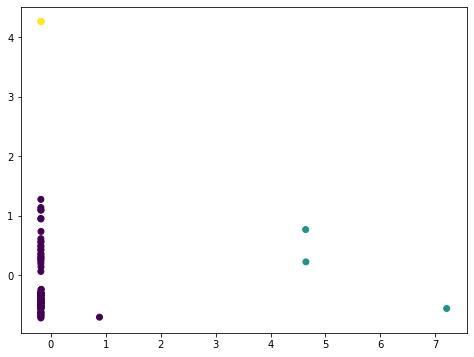

In [141]:
%matplotlib inline

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
# from numpy import random, float

data =X_pca

model = KMeans(n_clusters=3)

# Note I'm scaling the data to normalize it! Important for good results.
model = model.fit(scale(data))       # 對資料正規化很重要

# We can look at the clusters each data point was assigned to
print(model.labels_)

# And we'll visualize it:
plt.figure(figsize=(8, 6))
plt.scatter(data[:,0], data[:,1], c=model.labels_.astype(int))
plt.show()

In [130]:
data1.shape

(100, 634)

In [ ]:

from sklearn.decomposition import PCA
import pylab as pl
from itertools import cycle

In [ ]:
X = data1
pca = PCA(n_components=2, whiten=True).fit(X)  # whiten=True 表示資料需要正規化
X_pca = pca.transform(X)

In [ ]:
X_pca.shape